In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
                            classification_report,
                            confusion_matrix,
                            roc_auc_score,
                            roc_curve,
                            accuracy_score,
                            precision_recall_curve,
                            f1_score,
                            precision_score,
                            recall_score
                        )
warnings.filterwarnings('ignore')

In [2]:
seed = 42
np.random.seed(seed)

#### Loading Data

In [3]:
X_train = np.load('artifacts/X_train.npz')['arr_0']
Y_train = np.load('artifacts/Y_train.npz')['arr_0']
X_test = np.load('artifacts/X_test.npz')['arr_0']
Y_test = np.load('artifacts/Y_test.npz')['arr_0']

#### Model Training

In [4]:
model_lr = LogisticRegression(
                            random_state=42,
                            max_iter=1000
                        )

model_lr.fit(X_train,Y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Inference

In [5]:
Y_hat_train = model_lr.predict(X_train)
Y_hat_test = model_lr.predict(X_test)

#### Evaluation

In [6]:
accuracy = accuracy_score(Y_test, Y_hat_test)
precision = precision_score(Y_test, Y_hat_test)
recall = recall_score(Y_test, Y_hat_test)
f1 = f1_score(Y_test, Y_hat_test)

In [7]:
print(f'Accuracy : {accuracy}')
print(f'precision : {precision}')
print(f'recall : {recall}')
print(f'f1_score : {f1}')

Accuracy : 0.7672107877927609
precision : 0.5433526011560693
recall : 0.7560321715817694
f1_score : 0.6322869955156951


In [8]:
cm = confusion_matrix(Y_test, Y_hat_test)

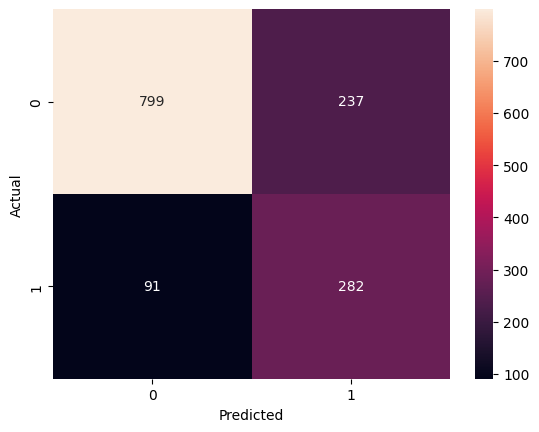

In [9]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()